<a href="https://colab.research.google.com/github/1900690/kyouyu/blob/main/syakuyaku_%E2%91%A1AI%E5%AD%A6%E7%BF%92%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6_0.0.8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**学習の事前準備を行う**
※ランタイムをGPUにすることで学習速度を早くする（ただし学習時間が長くなると使用制限に引っかかる。制限は日をまたぐと解除される）

In [ ]:
#@title 1.グーグルドライブに接続

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title 2.学習画像をアップロード
#@markdown   ”①AI学習用データ作成について”作成した画像をアップロード

#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math

#スイッチ
グーグルドライブからアップロード=True#@param {type:"boolean"}
drive=グーグルドライブからアップロード
ローカルからアップロード=False#@param {type:"boolean"}
direct=ローカルからアップロード

#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")
if os.path.exists("/content/datasets.zip"):
  os.remove("/content/datasets.zip")

if direct==True:
  #データをアップロード
  uploaded = files.upload()
  #データを解凍
  shutil.unpack_archive('/content/datasets.zip', '/content/datasets')
if drive==True:
  #グーグルドライブに接続
  #drive.mount('/content/drive')
  #グーグルドライブからcontentにコピー
  shutil.copyfile("/content/drive/MyDrive/datasets.zip","/content/datasets.zip")
  #データを解凍
  shutil.unpack_archive('/content/datasets.zip', '/content/datasets')

#パスを作成
train_images = '/content/datasets/syakuyaku/train/images'
train_labels = '/content/datasets/syakuyaku/train/labels'
valid_images = '/content/datasets/syakuyaku/valid/images'
valid_labels = '/content/datasets/syakuyaku/valid/labels'

#ファイル数を出力
print("train/imagesは",sum(os.path.isfile(os.path.join(train_images, name)) for name in os.listdir(train_images)))
print("train/labelsは",sum(os.path.isfile(os.path.join(train_labels, name)) for name in os.listdir(train_labels)))
print("valid/imagesは",sum(os.path.isfile(os.path.join(valid_images, name)) for name in os.listdir(valid_images)))
print("valid/labelsは",sum(os.path.isfile(os.path.join(valid_labels, name)) for name in os.listdir(valid_labels)))
print("最大公約数は",math.gcd(sum(os.path.isfile(os.path.join(train_images, name)) for name in os.listdir(train_images)),sum(os.path.isfile(os.path.join(valid_images, name)) for name in os.listdir(valid_images))))

train/imagesは 80
train/labelsは 80
valid/imagesは 15
valid/labelsは 15
最大公約数は 5


In [ ]:
#@title 3.学習結果を保存するフォルダを作成
if not os.path.exists('/content/drive/MyDrive/pest-object-detection/'):
  os.mkdir('/content/drive/MyDrive/pest-object-detection/')

In [ ]:
#@markdown *  パスなどを記載したファイルを作成
%%writefile /content/drive/MyDrive/pest-object-detection/data.yaml
# COCO 2017 dataset http://cocodataset.org

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./syakuyaku/train
val: ./syakuyaku/valid

# number of classes
nc: 6

# class names
names: ['E','A','B','C','D','X']

Overwriting /content/drive/MyDrive/pest-object-detection/data.yaml


In [ ]:
#@title 4.ultralytics(AIライブラリ)をインストール
%pip -q install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


#**学習**

##1.学習設定について

*   モデルタイプは検出精度や速度ごとに様々。検出精度が高くなると速度が遅くなる
*   画像サイズは正方形であれば自動的に調整される



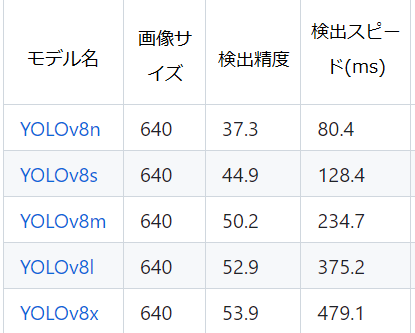

In [7]:
#@title 2-1.初めに学習を開始する場合
#スイッチ
選択するモデルタイプ="yolov8x.pt"#@param ["yolov8n.pt", "yolov8s.pt", "yolov8m.pt", "yolov8l.pt", "yolov8x.pt"]
#@markdown ※学習回数を変更する場合は”コードの表示”を押す

#キャッチを消しておく
import os
if os.path.exists("/content/datasets/syakuyaku/train/labels.cache"):
    os.remove("/content/datasets/syakuyaku/train/labels.cache")
if os.path.exists("/content/datasets/syakuyaku/valid/labels.cache"):
    os.remove("/content/datasets/syakuyaku/valid/labels.cache")

#作業ディレクトリを移動
%cd '/content/drive/MyDrive/pest-object-detection/'

#confの値は閾値　epochsの値は学習回数を表す
if 選択するモデルタイプ=="yolov8n.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8n.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=20
if 選択するモデルタイプ=="yolov8s.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8s.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10
if 選択するモデルタイプ=="yolov8m.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8m.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10
if 選択するモデルタイプ=="yolov8l.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8l.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10
if 選択するモデルタイプ=="yolov8x.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8x.pt\
        data=data.yaml\
        conf=0.7\
        batch=2\
        imgsz=1280\
        epochs=100

/content/drive/MyDrive/pest-object-detection
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=150, patience=50, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.7, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz

In [ ]:
#@title 2-2.途中から学習を再開する場合

#@markdown ※”コードの表示”を押して、パスを記載する

#キャッチを消しておく
import os
if os.path.exists("/content/datasets/syakuyaku/train/labels.cache"):
    os.remove("/content/datasets/syakuyaku/train/labels.cache")
if os.path.exists("/content/datasets/syakuyaku/valid/labels.cache"):
    os.remove("/content/datasets/syakuyaku/valid/labels.cache")

#作業ディレクトリを移動
%cd '/content/drive/MyDrive/pest-object-detection/'

#”model=”から後の部分に前回学習した際の”last.pt”までのパスを記載する
!yolo task=detect mode=train resume=True model="/content/drive/MyDrive/pest-object-detection/runs/detect/train3/weights/last.pt" 

/content/drive/MyDrive/pest-object-detection
WARNING ⚠️ 'data' is missing. Using default 'data=coco128.yaml'.
Ultralytics YOLOv8.0.111 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/pest-object-detection/runs/detect/train3/weights/last.pt, data=data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.7, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visu

##3.学習結果について

*   mAPが検出精度を表し、1に近いほど検出精度が高いことを示す


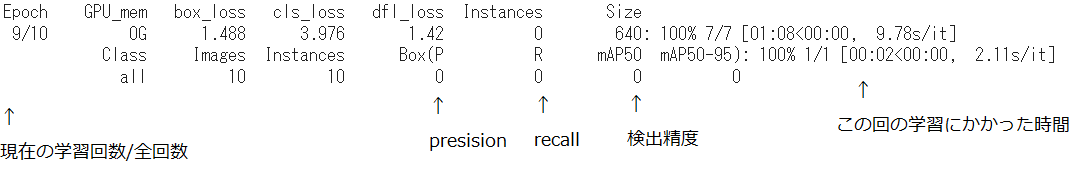

/content/drive/MyDrive/pest-object-detection/runs/detect/train2/results.pngを表示します


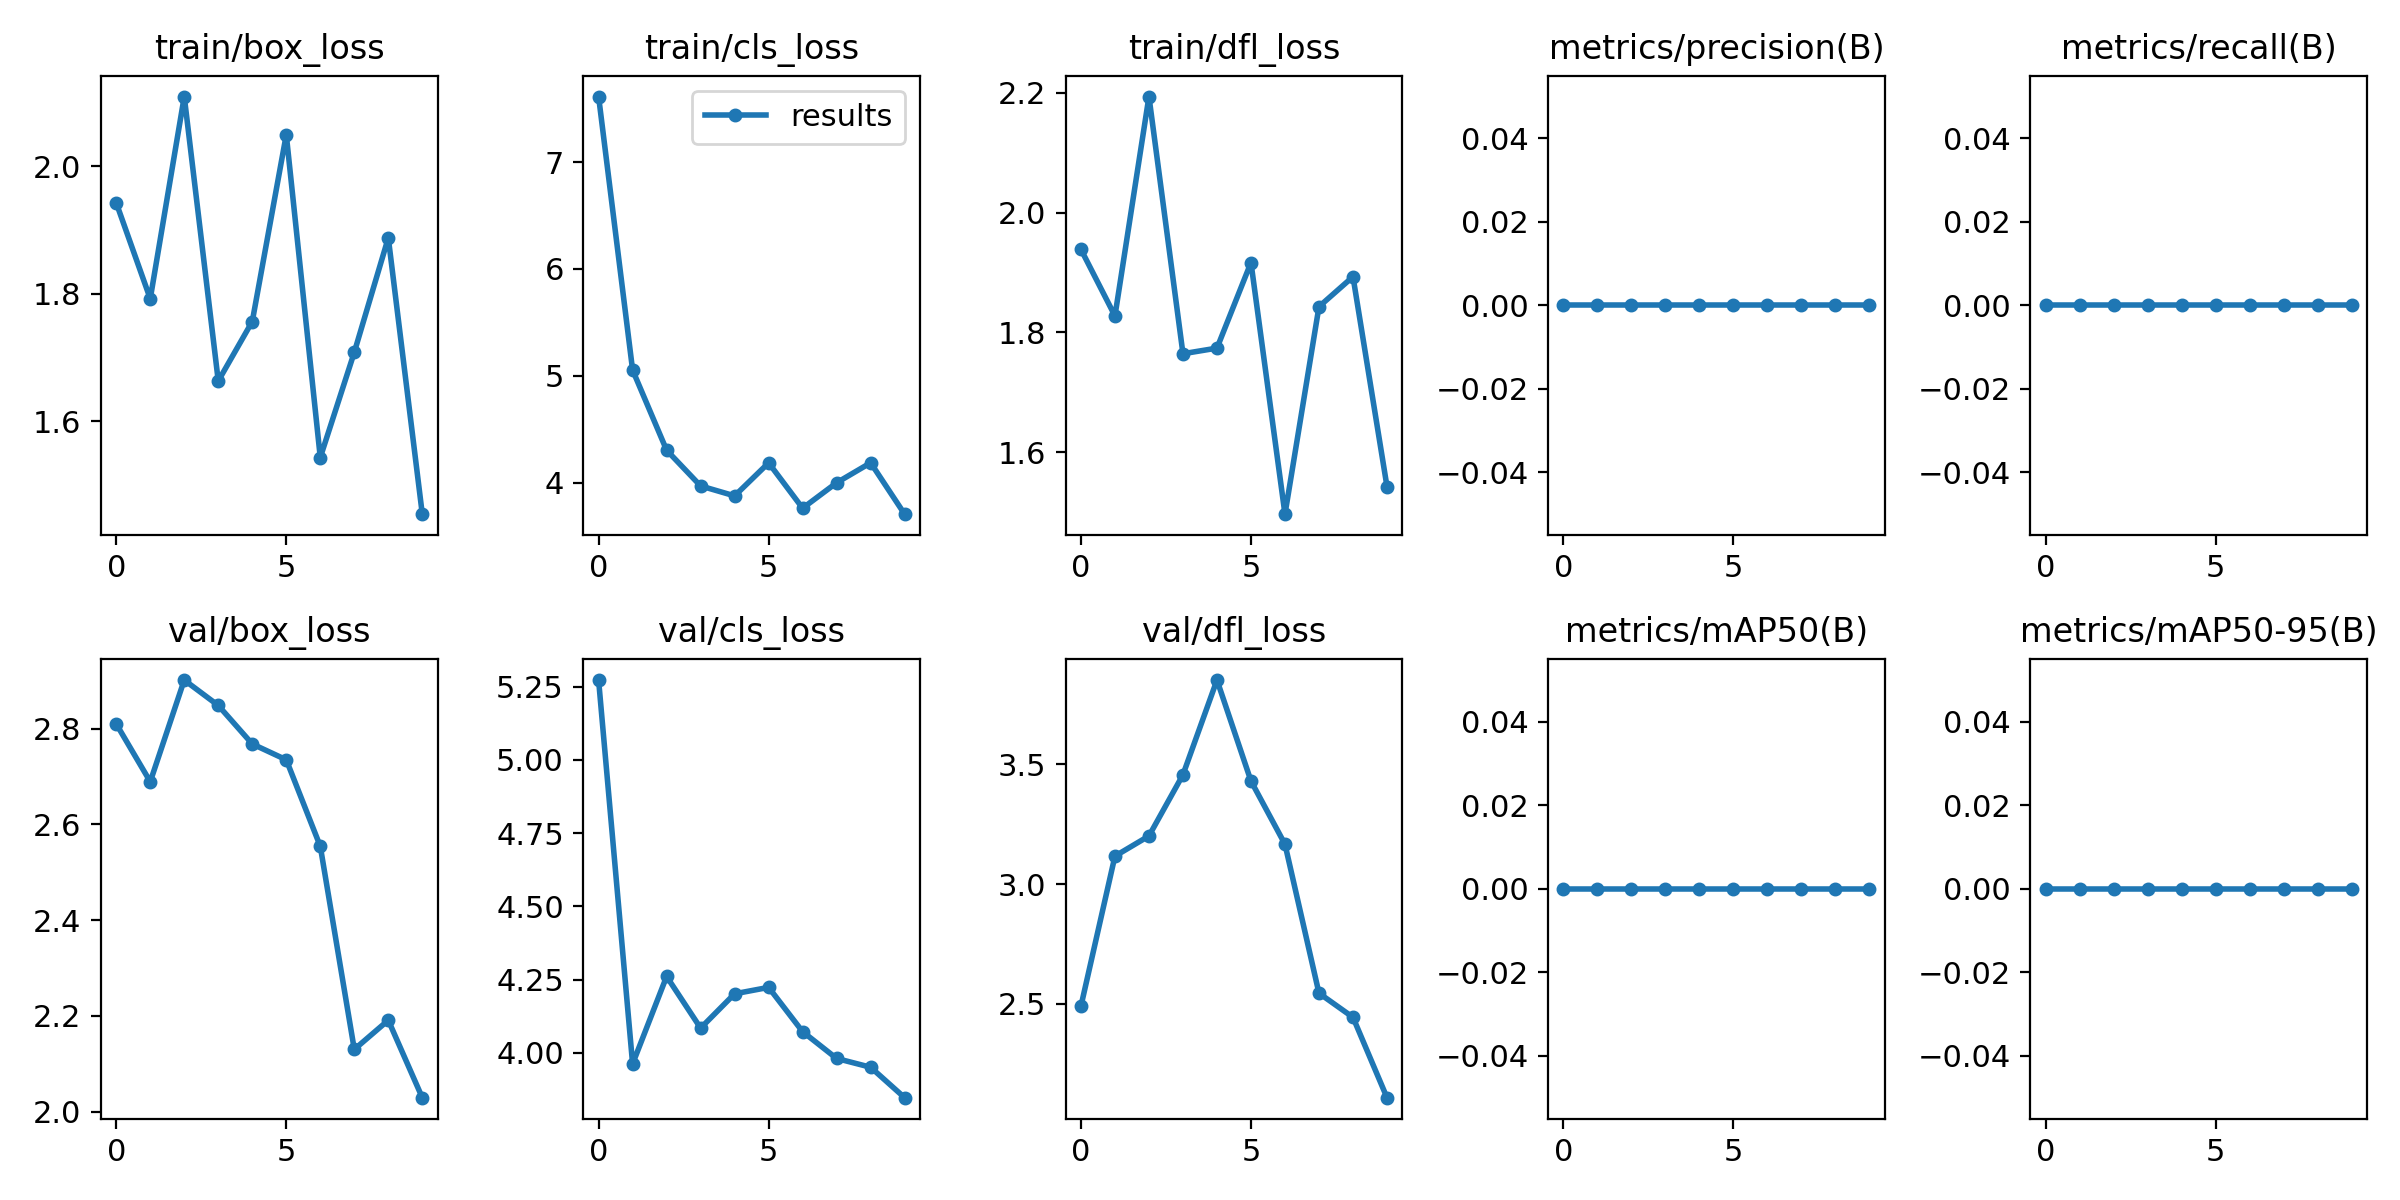

In [ ]:
#@title 学習ごとの結果の推移を表示
#@markdown *  metrics/mAP50(B)が検出精度の推移を表す。１に近いほうが良い
#@markdown *  [そのほかの指標の見方についてはこちら](https://www.nakasha.co.jp/future/ai/yolov3train.html#:~:text=%E8%A9%95%E4%BE%A1%E6%8C%87%E6%A8%99%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6,%E3%81%A7%E3%81%8D%E3%81%AA%E3%81%84%E5%AD%90%EF%BC%89)

#ライブラリをインポート
from IPython.display import Image,display_png,display_jpeg

#最終学習結果が格納されているパスを取得
result_folda_pass="/content/drive/MyDrive/pest-object-detection/runs/detect/"
read_files_annotations = os.listdir(result_folda_pass)
read_files_annotations.sort(reverse=True)
result_pass=result_folda_pass+read_files_annotations[0]+"/results.png"

print(result_pass+"を表示します")
display_png(Image(result_pass))

##4.学習済みAIを保存

In [ ]:
#ライブラリをインポート
import shutil
import os
from google.colab import files

#スイッチ
ファイルをダウンロードする=True#@param {type:"boolean"}
direct=ファイルをダウンロードする

#最終学習結果が格納されているパスを取得
result_folda_pass="/content/drive/MyDrive/pest-object-detection/runs/detect/"
read_files_annotations = os.listdir(result_folda_pass)
read_files_annotations.sort(reverse=True)
result_pass=result_folda_pass+read_files_annotations[0]+"/weights/best.pt"
  
if direct==True:
  files.download(result_pass)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>